<a href="https://colab.research.google.com/github/ebzkurt1/ml_from_scratch/blob/main/ML_Models_with_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

np.random.seed(1)

## Data Handling

### Loading the Iris data

In [5]:
iris_X, iris_y = datasets.load_iris(
    return_X_y=True # When set true the function returns (X,y)
)
iris_X = iris_X[:,[2,3]]
print("Iris data size : ", iris_X.shape)
print("Iris data unique labels : ", np.unique(iris_y))

Iris data size :  (150, 2)
Iris data unique labels :  [0 1 2]


### Generating syntetic data
Syntetic XOR data

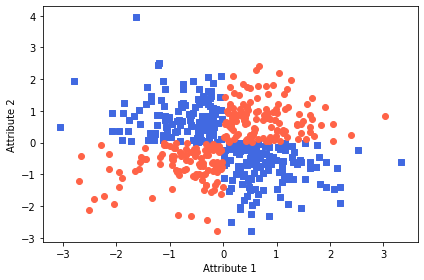

In [6]:
X_xor = np.random.randn(500,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    c='royalblue',
    marker='s',
    label='Class 1'
)
plt.scatter(
    X_xor[y_xor == 0, 0],
    X_xor[y_xor == 0, 1],
    c='tomato',
    marker='o',
    label='Class 0'
)
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.tight_layout()

### Splitting the data into train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.3, # Test data size
    random_state=1, # Specifying the random state
    stratify=iris_y # To acquire same label size in each split
)

print("Train data size : ", X_train.shape)
print("Train data label number for each label : ", np.bincount(y_train))

print("Test data size : ", X_test.shape)
print("Test data label number for each label : ", np.bincount(y_test))

Train data size :  (105, 2)
Train data label number for each label :  [35 35 35]
Test data size :  (45, 2)
Test data label number for each label :  [15 15 15]


### Scaling the data

In [8]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

print("Mean of the train data BEFORE scaling : ", X_train.mean())

X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

print("Mean of the train data AFTER scaling : ", X_train_scaled.mean())

Mean of the train data BEFORE scaling :  2.4933333333333327
Mean of the train data AFTER scaling :  1.0150610510858574e-16


## Plot Helper Function
The functions provided in this section can help visualize the model results, weights and so on to provide a better understanding of their results.

In [9]:
def plot_model_decision_region(
    X, # Attributes of the data
    y, # Labels of the data
    classifier,
    test_idx=None,
    resolution=0.02,
):
    """
    """
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='none',
                    edgecolor='black',
                    alpha=0.1,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

## Model Generation

### Perceptron model

In [10]:
perceptron_model = Perceptron(
    eta0=0.1, # Learning rate of the model
    random_state=1
)
perceptron_model.fit(
    X_train_scaled,
    y_train
)
perceptron_prediction = perceptron_model.predict(X_test_scaled)
perceptron_accuracy = (perceptron_prediction==y_test).sum()/y_test.shape[0]
print("Perceptron model accuracy is : ", perceptron_accuracy)

Perceptron model accuracy is :  0.9777777777777777


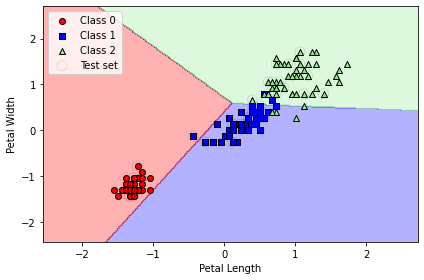

In [11]:
plot_model_decision_region(
    X=np.vstack((X_train_scaled,X_test_scaled)),
    y=np.hstack((y_train,y_test)),
    classifier=perceptron_model,
    test_idx=range(105,150)
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.tight_layout()

### Logistic Regression model

In [12]:
logistic_model = LogisticRegression(
    C=100.0,
    solver='lbfgs',
    multi_class='ovr'
)
logistic_model.fit(X_train_scaled,y_train)
logistic_prediction = logistic_model.predict(X_test_scaled)
logistic_accuracy = (logistic_prediction==y_test).sum()/y_test.shape[0]
print("Logistic Regression model accuracy is : ", logistic_accuracy)

print("Example model prediction probabilities : \n",logistic_model.predict_proba(X_test_scaled[:3,:]))

Logistic Regression model accuracy is :  0.9777777777777777
Example model prediction probabilities : 
 [[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]]


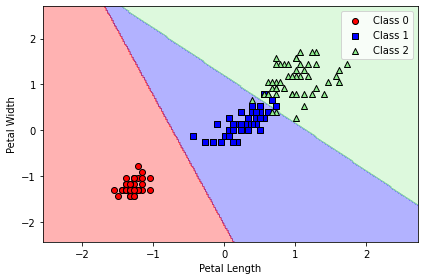

In [13]:
plot_model_decision_region(
    np.vstack((X_train_scaled,X_test_scaled)),
    np.hstack((y_train,y_test)),
    classifier=logistic_model
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.legend()

### Support Vector Machine model

In [14]:
svm_model = SVC(
    kernel='linear',
    C=1.0,
    random_state=1
)
svm_model.fit(X_train_scaled,y_train)
svm_prediction = svm_model.predict(X_test_scaled)
svm_accuracy = (svm_prediction==y_test).sum()/y_test.shape[0]
print("Support Vector Machine model accuracy is : ", svm_accuracy)

Support Vector Machine model accuracy is :  0.9777777777777777


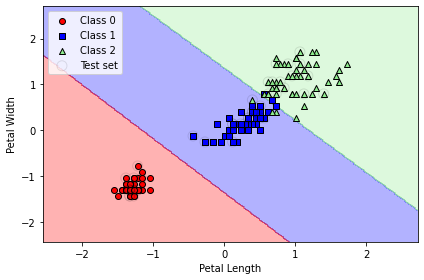

In [15]:
plot_model_decision_region(
    np.vstack((X_train_scaled,X_test_scaled)),
    np.hstack((y_train,y_test)),
    classifier=svm_model,
    test_idx=range(105,150)
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.legend()

### Stochastic Gradient Classifier model
The Stochastic Gradient Classifier can be used for online learning. All of the previous models can be generated using the SGDClassifier model of the Scikit-learn library. These model can be trained with upcoming single line of data by using the `partial_fit` method.

In [16]:
sgd_perceptron_model = SGDClassifier(loss='perceptron')
sgd_logstic_model = SGDClassifier(loss='log')
sgd_svm_model = SGDClassifier(loss='hinge')

sgd_perceptron_model.fit(X_train_scaled,y_train)
sgd_perceptron_prediction = sgd_perceptron_model.predict(X_test_scaled)
sgd_perceptron_accuracy = (sgd_perceptron_prediction==y_test).sum()/y_test.shape[0]
print("SGD Perceptron model accuracy is : ", sgd_perceptron_accuracy)

sgd_logstic_model.fit(X_train_scaled,y_train)
sgd_logstic_prediction = sgd_logstic_model.predict(X_test_scaled)
sgd_logstic_accuracy = (sgd_logstic_prediction==y_test).sum()/y_test.shape[0]
print("SGD Logistic model accuracy is : ", sgd_logstic_accuracy)

sgd_svm_model.fit(X_train_scaled,y_train)
sgd_svm_prediction = sgd_svm_model.predict(X_test_scaled)
sgd_svm_accuracy = (sgd_svm_prediction==y_test).sum()/y_test.shape[0]
print("SGD SVM model accuracy is : ", sgd_svm_accuracy)

SGD Perceptron model accuracy is :  0.6666666666666666
SGD Logistic model accuracy is :  0.9555555555555556
SGD SVM model accuracy is :  0.8444444444444444


### SVM model with kernel
Since the SVM is a liner model it will be unable to properly classify non-linear data, such as XOR data. So, we can use Kernel methods to solve non-linear problems.

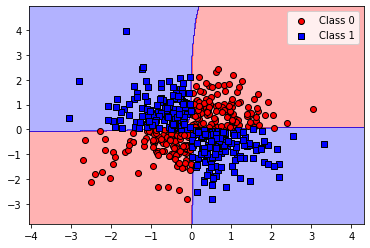

In [17]:
kernel_svm_model = SVC(
    kernel='rbf', # Radial Basis Function or Gaussian Kernel
    random_state=1,
    gamma=0.10, # Cut-off parameter of the Gaussian
    C=10.0,
)
kernel_svm_model.fit(X_xor,y_xor)
plot_model_decision_region(
    X_xor,
    y_xor,
    classifier=kernel_svm_model
)
plt.legend()

### Decision Tree model

In [18]:
decision_tree_model = DecisionTreeClassifier(
    criterion='gini', # Criterion of the impurity of the nodes
    max_depth=5,
    random_state=1
)
decision_tree_model.fit(X_train_scaled,y_train)
decision_tree_prediction = decision_tree_model.predict(X_test_scaled)
decision_tree_accuracy = (decision_tree_prediction == y_test).sum()/y_test.shape[0]
print("Decision Tree model accuracy : ", decision_tree_accuracy)

Decision Tree model accuracy :  0.9777777777777777


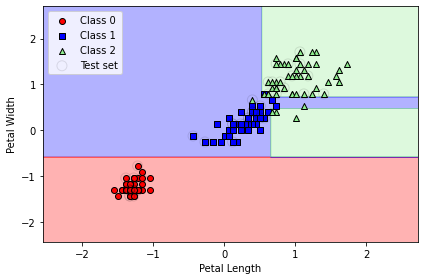

In [19]:
plot_model_decision_region(
    np.vstack((X_train_scaled,X_test_scaled)),
    np.hstack((y_train,y_test)),
    classifier=decision_tree_model,
    test_idx=range(105,150)
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.legend()

[Text(0.25, 0.9166666666666666, 'Sepal Width <= -0.586\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.375, 0.75, 'Sepal Length <= 0.536\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5833333333333334, 'Sepal Width <= 0.725\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.4166666666666667, 'Sepal Length <= 0.647\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.25, 'Sepal Width <= 0.463\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.75, 0.4166666666666667, 'Sepal Length <= 0.591\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.25, 'g

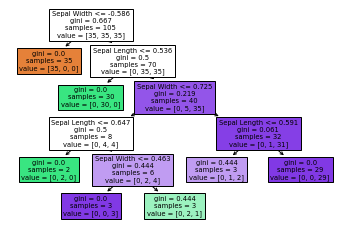

In [20]:
from sklearn import tree

feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
tree.plot_tree(decision_tree_model,
               feature_names=feature_names,
               filled=True)

### Random Forest model
Random Forest consists of multiple random decision tree models. It is an ensemble model where the overall outcome is found by majority voting among the trees. The randomness of the model comes from the bootstrap.

In [26]:
forest_model = RandomForestClassifier(
    n_estimators=25, # Number of trees generated in the model
    random_state=1,
    n_jobs=2 # Making parallel computing by using 2 cores
)
forest_model.fit(X_train_scaled,y_train)
forest_prediction = forest_model.predict(X_test_scaled)
forest_accuracy = (forest_prediction == y_test).sum()/y_test.shape[0]
print("Random Forest model accuracy : ", forest_accuracy)

Random Forest model accuracy :  0.9777777777777777


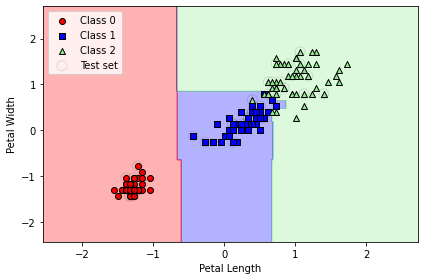

In [23]:
plot_model_decision_region(
    np.vstack((X_train_scaled,X_test_scaled)),
    np.hstack((y_train,y_test)),
    classifier=forest_model,
    test_idx=range(105,150)
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.legend()

### KNN model

In [27]:
knn_model = KNeighborsClassifier(
    n_neighbors=5, # Number of neighbors used for majority voting
    p=2,
    metric='minkowski', # Distance measure used in the model
)
knn_model.fit(X_train_scaled,y_train)
knn_prediction = knn_model.predict(X_test_scaled)
knn_accuracy = (knn_prediction == y_test).sum()/y_test.shape[0]
print("KNN model accuracy : ", knn_accuracy)

KNN model accuracy :  1.0


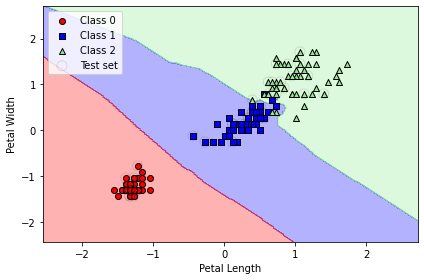

In [28]:
plot_model_decision_region(
    np.vstack((X_train_scaled,X_test_scaled)),
    np.hstack((y_train,y_test)),
    classifier=knn_model,
    test_idx=range(105,150)
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.legend()